In [1]:
# MNIST
# DataLoader, Trasfornations
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop
# Model evaluation
# GPU support

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


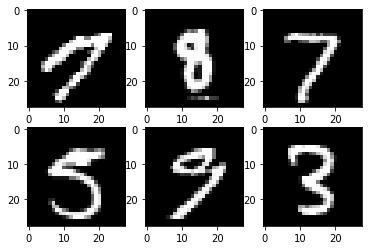

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
EPOCHS = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(
    root = './data', train=True, transform=transforms.ToTensor(),
    download=True
)
test_dataset = torchvision.datasets.MNIST(
    root = './data', train=False, transform=transforms.ToTensor()
)

# to load the data
train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset, batch_size = batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset = train_dataset, batch_size = batch_size, shuffle=True
)

# check all are working good
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no sigmoid required as CrossEntropyLosss contain sigmoid
        
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        # forward pass
        images = images.reshape((batch_size, -1)).to(device)
        labels = labels.to(device)
        y_pred = model(images)
        l = loss(y_pred, labels)
        
        # zero the grads
        optimizer.zero_grad()
        
        # backward pass
        l.backward()
        
        # update weight
        optimizer.step()
        
        if (i+1)%5 == 0:
            print(f'eopch: {epoch+1}/{EPOCHS}, step {i+1}/{n_total_steps}, loss = {l:.4f}')
            
# calculate the accuracy
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape((batch_size, -1)).to(device)
        labels = labels.to(device)
        output = model(images)
        
        # torch.max return value, index
        _, predictions = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.*n_correct / n_samples
    print(f'accuracy = {acc}')       

eopch: 1/2, step 5/600, loss = 2.1428
eopch: 1/2, step 10/600, loss = 1.9162
eopch: 1/2, step 15/600, loss = 1.6392
eopch: 1/2, step 20/600, loss = 1.4517
eopch: 1/2, step 25/600, loss = 1.2635
eopch: 1/2, step 30/600, loss = 0.9911
eopch: 1/2, step 35/600, loss = 0.9066
eopch: 1/2, step 40/600, loss = 0.7928
eopch: 1/2, step 45/600, loss = 0.6807
eopch: 1/2, step 50/600, loss = 0.8008
eopch: 1/2, step 55/600, loss = 0.6008
eopch: 1/2, step 60/600, loss = 0.6038
eopch: 1/2, step 65/600, loss = 0.7541
eopch: 1/2, step 70/600, loss = 0.5301
eopch: 1/2, step 75/600, loss = 0.5153
eopch: 1/2, step 80/600, loss = 0.5359
eopch: 1/2, step 85/600, loss = 0.5114
eopch: 1/2, step 90/600, loss = 0.4600
eopch: 1/2, step 95/600, loss = 0.5454
eopch: 1/2, step 100/600, loss = 0.4389
eopch: 1/2, step 105/600, loss = 0.3491
eopch: 1/2, step 110/600, loss = 0.5114
eopch: 1/2, step 115/600, loss = 0.6581
eopch: 1/2, step 120/600, loss = 0.3567
eopch: 1/2, step 125/600, loss = 0.3085
eopch: 1/2, step 130

eopch: 2/2, step 440/600, loss = 0.2123
eopch: 2/2, step 445/600, loss = 0.1617
eopch: 2/2, step 450/600, loss = 0.3064
eopch: 2/2, step 455/600, loss = 0.1662
eopch: 2/2, step 460/600, loss = 0.1869
eopch: 2/2, step 465/600, loss = 0.1188
eopch: 2/2, step 470/600, loss = 0.1727
eopch: 2/2, step 475/600, loss = 0.2199
eopch: 2/2, step 480/600, loss = 0.4462
eopch: 2/2, step 485/600, loss = 0.3832
eopch: 2/2, step 490/600, loss = 0.2235
eopch: 2/2, step 495/600, loss = 0.2435
eopch: 2/2, step 500/600, loss = 0.1886
eopch: 2/2, step 505/600, loss = 0.2450
eopch: 2/2, step 510/600, loss = 0.2528
eopch: 2/2, step 515/600, loss = 0.3482
eopch: 2/2, step 520/600, loss = 0.2806
eopch: 2/2, step 525/600, loss = 0.0687
eopch: 2/2, step 530/600, loss = 0.2042
eopch: 2/2, step 535/600, loss = 0.1913
eopch: 2/2, step 540/600, loss = 0.1756
eopch: 2/2, step 545/600, loss = 0.1724
eopch: 2/2, step 550/600, loss = 0.2207
eopch: 2/2, step 555/600, loss = 0.1416
eopch: 2/2, step 560/600, loss = 0.0941
